# Visualising of Netflix Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


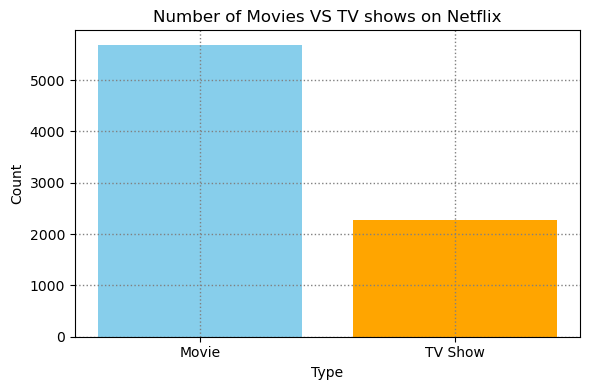

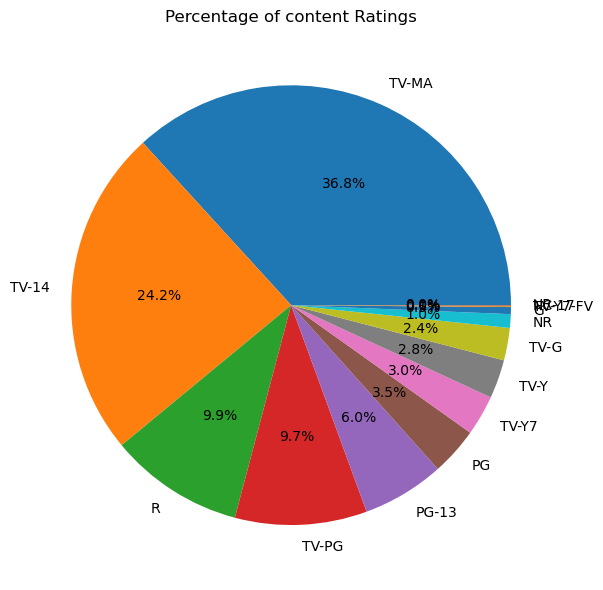

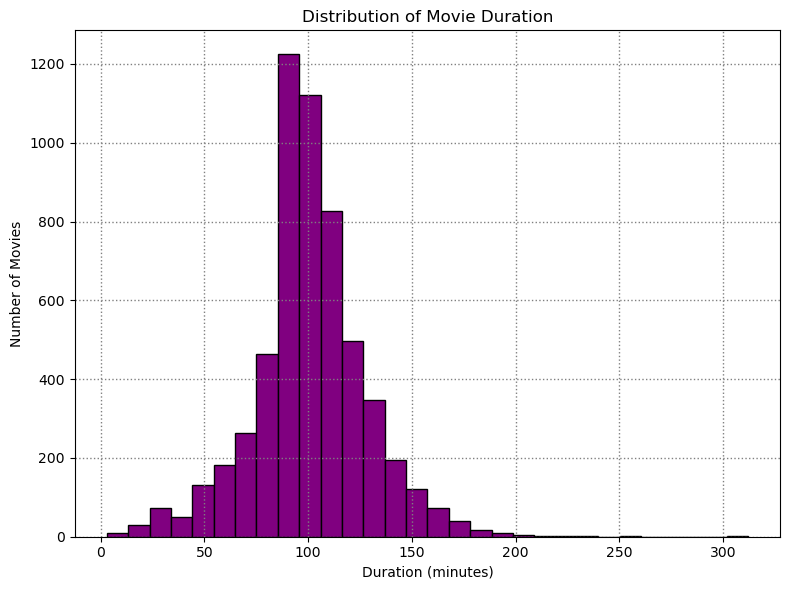

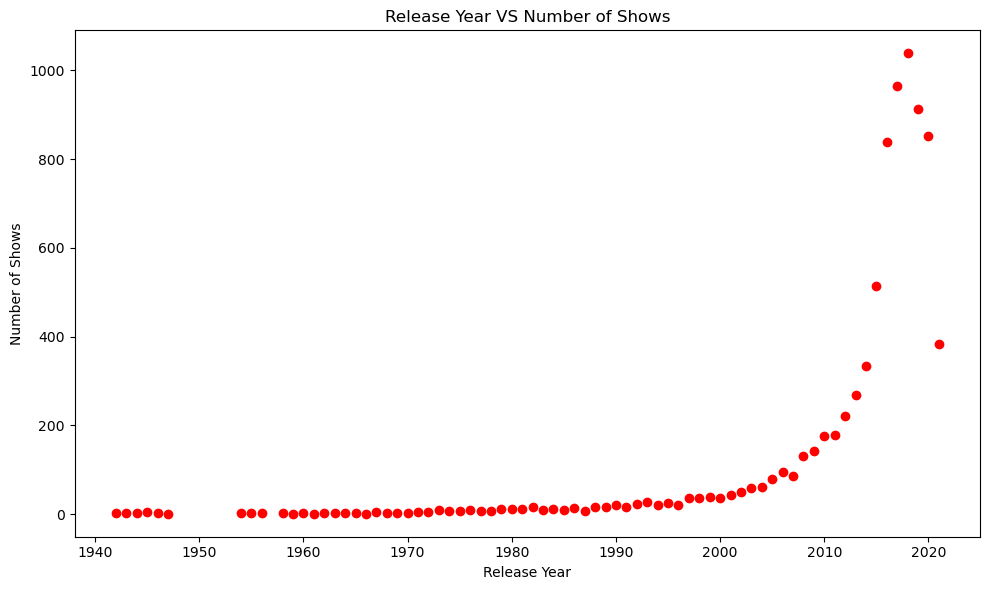

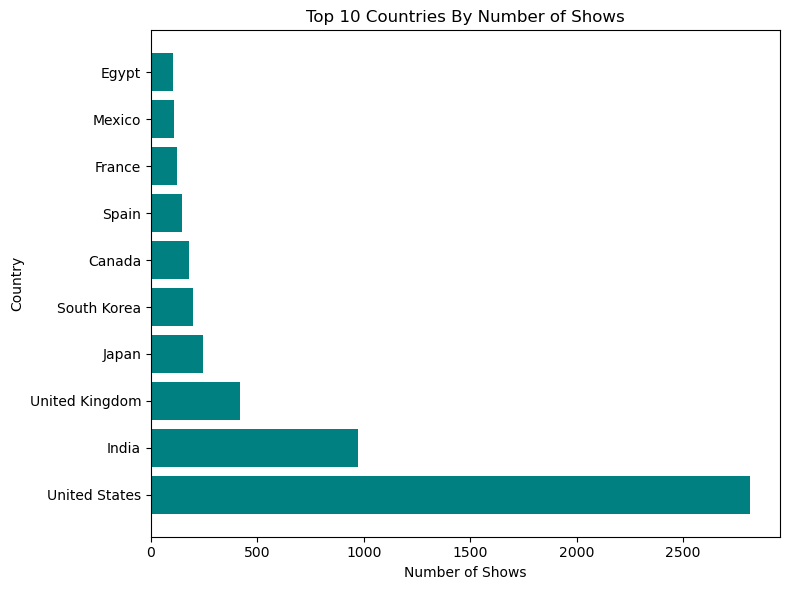

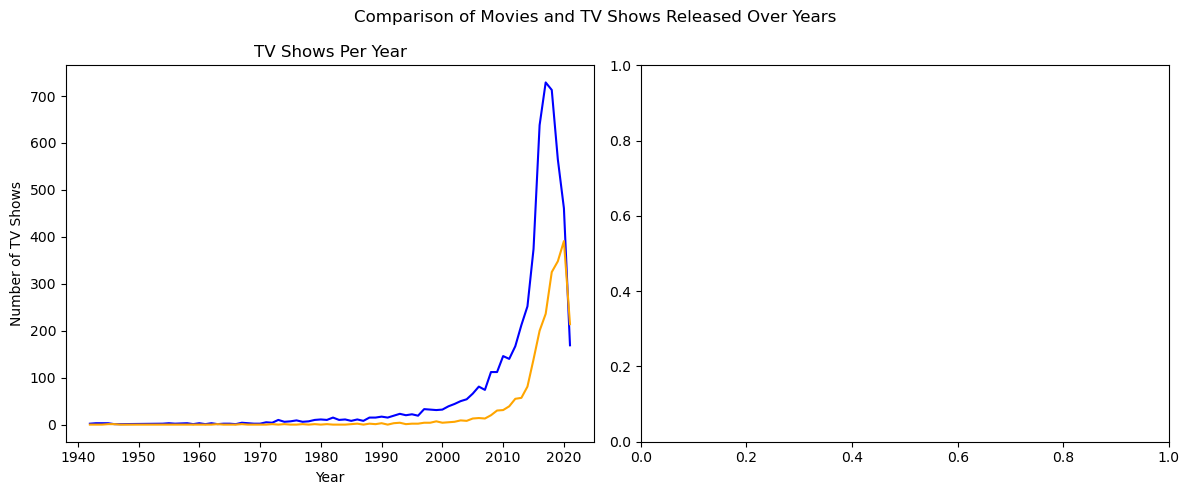

In [ ]:
# Clean data
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration']) 

# Bar Plot
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title("Number of Movies VS TV shows on Netflix")
plt.xlabel('Type')
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tv_shows.png")
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.show()


# Pie Chart
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title("Percentage of content Ratings")
plt.tight_layout()
plt.savefig("content_rating_pie.png")
plt.show()



# Filter movies only
movie_df = df[df['type'] == 'Movie'].copy()

# Clean and convert duration to integer
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '').astype(int)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')  # fixed typo: "puple" → "purple"
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig("movie_duration_histogram.png")
plt.show()

# Scatter Plot

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig("release_year_Scatter.png")
plt.show()


# Horizontal Bar Chart
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries By Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig("Top10_countries.png")
plt.show()

# Subplot

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# 1st subplot:movie
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='Blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# 2nd subplot:movie
ax[0].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[0].set_title('TV Shows Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of TV Shows')

plt.suptitle('Comparison of Movies and TV Shows Released Over Years')
plt.tight_layout()
plt.savefig('Movies_TV_Shows_Comparisons.png')
plt.show()
